The predicted value for the index 0 item is tested_positive; actual value is tested_positive.
The predicted value for the index 1 item is tested_positive; actual value is tested_positive.
The predicted value for the index 2 item is tested_positive; actual value is tested_positive.
The predicted value for the index 3 item is tested_negative; actual value is tested_negative.
The predicted value for the index 4 item is tested_negative; actual value is tested_negative.
The predicted value for the index 5 item is tested_positive; actual value is tested_positive.
The predicted value for the index 6 item is tested_positive; actual value is tested_positive.
The predicted value for the index 7 item is tested_positive; actual value is tested_positive.
The predicted value for the index 8 item is tested_negative; actual value is tested_negative.
The predicted value for the index 9 item is tested_negative; actual value is tested_positive.

True Positives: 6
True Negatives: 3
False Positives: 0
Fals

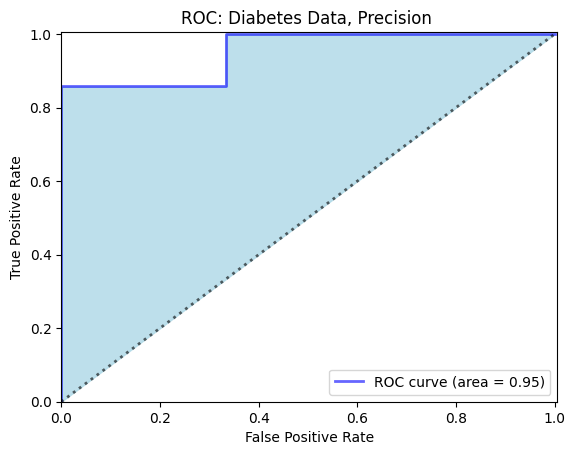

In [ ]:
# In[1]:

from sklearn.svm import SVC
from pandas import read_csv

f = 4.95 # modifying parameter for easy/lazy characterization against the original parameters (i.e. replace coefficients with "f"), best observed is 4.3-5.6 (4.95 used)
C = f*1e+04 # regularization parameter, can be thought of as "strength of assessment": modified, best observed is f*1e+04
gamma = f*1e-06 # specification parameter, can be thought of as "fitting of assessment": modified, best observed is f*1e-06
clf = SVC(C=C, gamma=gamma, kernel="rbf", probability=True) # Support Vector Classification module based on LibSVM chosen, "clf" is "classifier"; using rbf for dynamic kernel generation of unlimited degree

# In[2]:

train = read_csv("../diabetes_train.csv").iloc[:-10,:] # training data (passed as direct upload to Colab local directory), all but the last 10 rows
train = train.reset_index(drop=True) # resets first index to 0 so the actual position in source data does not need to be known
test = read_csv("../diabetes_train.csv").iloc[-10:,:] # testing data, only the last 10 rows are the new samples
test = test.reset_index(drop=True) # resets first index to 0 so the actual position in source data does not need to be known

# In[3]:

clf = clf.fit(train.iloc[:,:-1], train.iloc[:,-1]) # first paramater takes the data range by column without including its classification; second uses the last column as labels on the vertical axis
y_pred = clf.predict(test.iloc[:,:-1]) # give a prediction on the unknown test set, excluding the last column

# In[4]:

from sklearn.metrics import confusion_matrix # using the parameters, pass in a confusion matrix
y_true = test.iloc[:,-1] # passes in the real values of the last column; indices reset upon being sent to new dataframe

for i in test.index:
    print("The predicted value for the index " + str(i) + " item is " + str(y_pred[i]) + "; actual value is " + str(y_true[i]) + ".")

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() # wraps the matrix outputs, which are mapped "row-wise per column," in an array mapped "column-wise per row" (explaining the split in negative and positive values) for easy data passing
print()
print("True Positives: " + str(tp))
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print()
print("Precision: " + str(round(tp/(tp+fp), 4))) # assessment of correct positives out of determined positives
print("Recall: " + str(round(tp/(tp+fn), 4))) # assessment of correct positives out of actual positives
print()

# In[5]:

from sklearn.metrics import roc_curve, auc # area-under-curve and receiver operating characteristics imports
from scipy import interp # allows for data interpolation (estimation) in cases of missing plot points along a curve

scores = clf.predict_proba(test.iloc[:,0:8]) # this function predicts probabilities of a class rather than asserting the class itself as with predict()
fpr, tpr, thresholds = roc_curve(y_true, scores[:,1], pos_label="tested_positive") # establishes false positive and true positive rates as well as thresholds
roc_auc = auc(fpr,tpr) # build-out of the area under the curve

# In[6]:

get_ipython().magic("matplotlib inline")
import matplotlib.pyplot as plt # enables plot generation: must use inline version in Colab
plt.figure()
lw = 2
plt.plot(fpr, tpr, color="blue", alpha = 0.6,
         lw=lw, label="ROC curve (area = %0.2f)" % roc_auc) # makes a plot and label of the ROC area to two significant figures, reduced opacity
plt.fill_between(x=fpr, y1=fpr, y2=tpr, interpolate=True, color="lightblue", alpha = 0.8) # establishes a fill-between of the ROC area above the split line, slightly reduced opacity
plt.plot([0, 1], [0, 1], color="black", lw=lw, alpha=0.6, linestyle=':') # casts the diagonal line in the ROC curve, reduced opacity
plt.xlim([0.0, 1.005])
plt.ylim([0.0, 1.005])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: Diabetes Data, Precision ")
plt.legend(loc="lower right")
plt.show()